In [15]:
# importing needed libraries 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Importing and processing the data

In [16]:
# importing dataset that comes with seaborn
import seaborn as sns
iris = sns.load_dataset('iris')

# check first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\drake\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


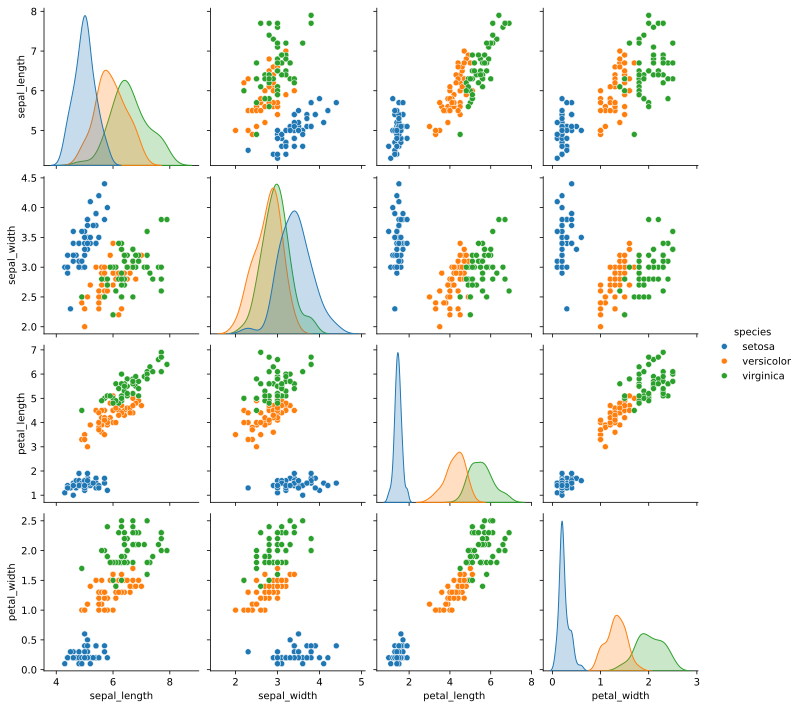

In [17]:
# plots to display the data
sns.pairplot(iris, hue='species')

In [18]:
# organizing the data 
# converting from pandas to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transforming species to number
labels = torch.zeros(len(data),dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 # don't need since everything is already 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Creating the ANN model

In [19]:
# model architecture
irisANN = nn.Sequential(
    nn.Linear(4,64),    # input layer
    nn.ReLU(),          # activation
    nn.Linear(64,64),   # hidden layer
    nn.ReLU(),          # activation
    nn.Linear(64,3),    # output layer
)

# loss function
lossFunction = nn.CrossEntropyLoss() # includes Log softmax

# optimizer
optimizer = torch.optim.SGD(irisANN.parameters(), lr=.01)

# Train the model

In [20]:
numEpochs = 1000

# initialize losses
losses = torch.zeros(numEpochs)
ongoingAccuracy = []

# iterating through training
for epochIDX in range(numEpochs):

    # forward pass
    yHat = irisANN(data)

    # computing loss
    loss = lossFunction(yHat, labels)
    losses[epochIDX] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # computing accuracy
    matches = torch.argmax(yHat, axis=1) == labels      # convert to bool
    matchesNumeric = matches.float()                    # convert to 0 or 1
    accuracyPercent = 100*torch.mean(matchesNumeric)    # take avg and *100
    ongoingAccuracy.append(accuracyPercent)

# final forward pass
predictions = irisANN(data)
predLabels = torch.argmax(predictions, axis=1)
totalACC = 100*torch.mean((predLabels == labels).float())

# Visualize the results

Final accuracy: 98.6667%


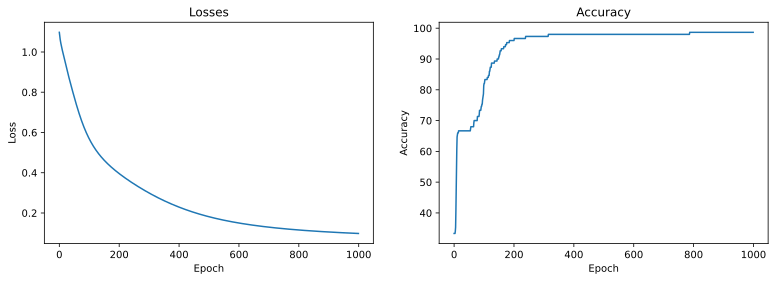

In [21]:
# report final accuracy 
print('Final accuracy: %g%%' %totalACC)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAccuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')

plt.show()

In [26]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

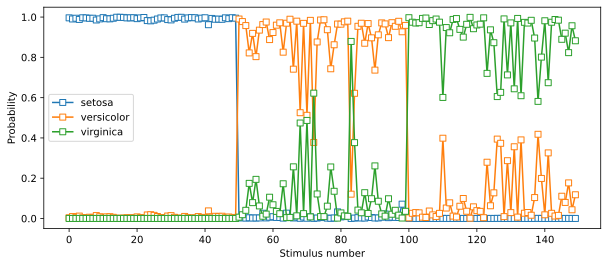

In [27]:
# plotting the raw model outputs

fix = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()